# Simulazione d'esame Laboratorio di Programamzione 2

## Esercizio 1

1° richiesta: **crea un vettore NumPy con i seguenti canoni mensili d'affitto (in euro) per 4 appartamenti: 720, 980, 650, 1200**

In [312]:
import numpy as np

In [313]:
canoni_mensili_list = [720, 980, 650, 1200]
can_mens_array = np.array(canoni_mensili_list, dtype = float)
print(f"Canoni mensili d'affitto: {can_mens_array}")

Canoni mensili d'affitto: [ 720.  980.  650. 1200.]


2° richiesta: **calcola la spesa totale mensile sostenuta dagli inquilini.**

In [314]:
spesa_tot = np.sum(can_mens_array)
print(f"La spesa totale sostenuta dagli inquilini è {spesa_tot} euro")

La spesa totale sostenuta dagli inquilini è 3550.0 euro


3° richiesta: **il proprietario dell'appartamento da 1200 € decide di aumentare l’affitto del 12%:**

- **Modifica il vettore per applicare l’aumento.**
- **L’importo aggiornato deve essere esattamente 1344,00 €, controlla se appare esattamente nel tuo array.**

In [315]:
# Modifica dell'importo: x / 1200 = 12 / 100 -> x = (12 * 1200) / 100 -> 1200 + x
can_mens_array[3] = ((12 * can_mens_array[3]) / 100) + can_mens_array[3]
print(f"Canoni mensili d'affitto aggiornati: {can_mens_array}")

Canoni mensili d'affitto aggiornati: [ 720.  980.  650. 1344.]


4° richiesta: **l'inquilino dell'appartamento da 650 € ottiene uno sconto del 10%.**

- **Applica la modifica.**

In [316]:
# Modifica dell'importo: x / 650 = 10 / 100 -> x = (10 * 650) / 100 -> 650 - x
can_mens_array[2] = can_mens_array[2] - ((10 * can_mens_array[2]) / 100)
print(f"Canoni mensili d'affitto aggiornati: {can_mens_array}")

Canoni mensili d'affitto aggiornati: [ 720.  980.  585. 1344.]


5° richiesta: **gli altri due appartamenti (720 € e 980 €) subiscono un aumento del 5%.**

- **Aggiorna il vettore di conseguenza.**

In [317]:
can_mens_array[0] = can_mens_array[0] + ((5 * can_mens_array[0]) / 100)
can_mens_array[1] = can_mens_array[1] + ((5 * can_mens_array[1]) / 100)
print(f"Canoni mensili d'affitto aggiornati: {can_mens_array}")

Canoni mensili d'affitto aggiornati: [ 756. 1029.  585. 1344.]


6° richiesta: **calcola la nuova spesa totale mensile dopo tutti i cambiamenti.**

In [318]:
nuova_spesa_tot = np.sum(can_mens_array)
print(f"La nuova spesa totale sostenuta dagli inquilini è {nuova_spesa_tot} euro")

La nuova spesa totale sostenuta dagli inquilini è 3714.0 euro


7° richiesta: **quanto ha influito l’aumento dell’affitto più alto sulla spesa complessiva?**

**(Suggerimento: confronta la spesa totale prima di qualsiasi modifica e dopo il solo aumento del canone a 1200 €.)**

## Esercizio 2


**Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione: a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.**

1° richiesta: **scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.**

In [332]:
def passo(N):
    interval = np.arange(-1, 2); nop = 0
    positions = np.random.choice(interval[interval != nop], size = N, replace = True)
    return positions

def tot_positions(n, N):
    initial_pos = np.zeros(N); mean = []; std_list = []

    for _ in range(1, n+1, 1):
        initial_pos = initial_pos + passo(N)
        mean.append(np.mean(initial_pos)); std_list.append(np.std(initial_pos))
    
    mean_array = np.array(mean); std_array = np.array(std_list)
    return mean_array, std_array

2° richiesta: **fai prima il plot della media delle posizione degli N camminatori per 100 passi**

In [333]:
import matplotlib.pyplot as plt

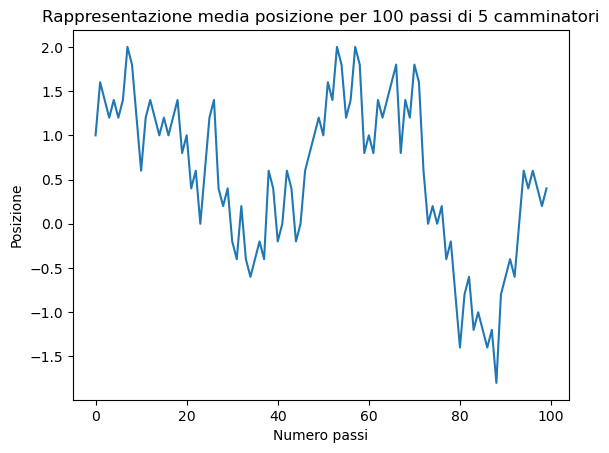

In [334]:
mean_a, _ = tot_positions(100, 5)
plt.plot(mean_a)
plt.title("Rappresentazione media posizione per 100 passi di 5 camminatori")
plt.xlabel("Numero passi")
plt.ylabel("Posizione")
plt.show()

3° richiesta: **Fai il plot con anche la devizione standard. La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?**

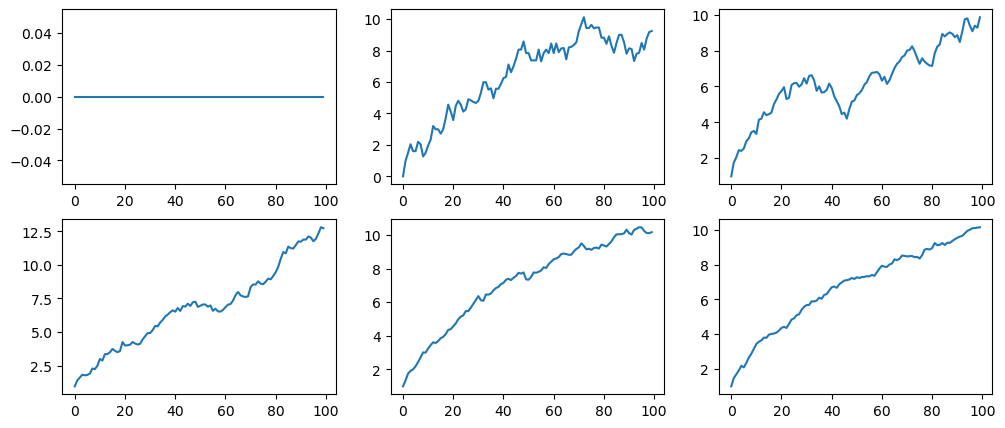

In [322]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))

# Deviazione standard per 1 camminatore
_, std_a1 = tot_positions(100, 1)
axs[0, 0].plot(std_a1)

# Deviazione standard per 5 camminatori
_, std_a2 = tot_positions(100, 5)
axs[0, 1].plot(std_a2)

# Deviazione standard per 10 camminatori
_, std_a10 = tot_positions(100, 10)
axs[0, 2].plot(std_a10)

# Deviazione standard per 20 camminatori
_, std_a20 = tot_positions(100, 20)
axs[1, 0].plot(std_a20)

# Deviazione standard per 50 camminatori
_, std_a50 = tot_positions(100, 50)
axs[1, 1].plot(std_a50)

# Deviazione standard per 100 camminatori
_, std_a100 = tot_positions(100, 100)
axs[1, 2].plot(std_a100)

plt.show()

## Esercizio 3

**Genera un array `a` di dimensioni 5 x 9 contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.
Per ogni riga, seleziona il numero più vicino a 0.1. Imposta il seed per la riproducibilità `np.random.seed(42)`.**

***Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli indici di riga corrispondenti agli elementi in `j`.**

In [323]:
np.random.seed(42)
a = np.random.normal(0, 1, size = (5,9))

for i in range(5):
    min_pos = 0
    initial_value = abs(a[i, 0]) - 0.1

    for j in range(1, 9, 1):
        value = abs(a[i, j]) - 0.1

        if initial_value > value:
            min_pos = j; initial_value = value

    print(f"Valore minimo nella riga i = {i}: {a[i, min_pos]}")

Valore minimo nella riga i = 0: -0.13826430117118466
Valore minimo nella riga i = 1: 0.24196227156603412
Valore minimo nella riga i = 2: 0.06752820468792384
Valore minimo nella riga i = 3: -0.013497224737933921
Valore minimo nella riga i = 4: -0.11564828238824053


## Esercizio 4

**Utilizza il dataset titanic, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"**

**Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.**

In [324]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.dropna(axis = 0, inplace = True)
df.reset_index(inplace = True)
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


1° richiesta: **visualizza i primi 10 passeggeri ordinati per tariffa pagata (`Fare`), dal più alto al più basso.**

In [325]:
df.sort_values('Fare', ascending = False, inplace = False).head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
137,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
7,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
71,341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
86,438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
13,88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
59,311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
155,742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
19,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
54,299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


2° richiesta: **calcola la media di:**

- **`Age` (età)**
- **`Fare` (tariffa)**
- **`SibSp` (numero di fratelli/coniugi a bordo)**

In [326]:
print(f"Media età: {int(df["Age"].mean())} anni")
print(f"Media tariffa: {round(df["Fare"].mean(), 4)}")
print(f"Media di parenti a bordo: {round(df["SibSp"].mean(), 4)}")

Media età: 35 anni
Media tariffa: 78.6825
Media di parenti a bordo: 0.4645


3° richiesta: **crea una nuova colonna chiamata Family_index, definita come:**
$$
family\_index = \frac{sibsp+parch}{fare}
$$

***(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)***

In [327]:
df["Fare"] = df["Fare"].replace(0, -1)
df["Family_Index"] = (df["SibSp"] + df["Parch"]) / (df["Fare"]); df.loc[df["Family_Index"] < 0, "Family_Index"] = np.nan
df["Fare"] = df["Fare"].replace(-1, 0)
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Index
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.000000
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.119760
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.038056
179,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.000000
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.012025
181,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.000000


## Esercizio 6

**Hai due array NumPy generati come segue:**

`x = np.linspace(0, 10, 100)`

`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

**Scrivi una funzione fit_line(x, y) che:**

- **usa `scipy.optimize.curve_fit` per eseguire un fitting lineare del tipo `y = a * x + b`;**
- **restituisce una tupla contenente:**
    - **i parametri ottimizzati `a` e `b`;**
    - **una stringa che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.**

**Esempio di output atteso: (3.02, 1.95, "y = 3.02 * x + 1.95")**

**Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.**

In [328]:
import scipy as sp

In [ ]:
def lineare(x, a ,b):
    return a * x + b

def fit_line(x, y):
    popt, _ = sp.optimize.curve_fit(lineare, x, y)

x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

IndentationError: expected an indented block after function definition on line 4 (158261526.py, line 7)